In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
pd.set_option('display.max_columns', 200)

In [ ]:
cities_df = pd.read_csv('cities.csv', encoding = "ISO-8859-1")
customers_df = pd.read_csv('customers.csv', encoding = "ISO-8859-1")
item_df = pd.read_csv('item_master.csv')
sales_df = pd.read_csv('sales.csv')
sales_rep_df = pd.read_csv('sales_rep.csv')

In [ ]:
cities_df.head(5)
# cities_df.isnull().sum().sort_values(ascending = False).plot(kind = 'bar')
# 1 null
cities_df['Desc'] = cities_df['Desc'].fillna('Unknown')
customers_df.head(5)
combined_cities_customers = pd.merge(cities_df, customers_df)

item_df
# item_df.isnull().sum().sort_values(ascending = False).plot(kind = 'bar')
# no null

sales_df
# sales_df.isnull().sum().sort_values(ascending = False).plot(kind = 'bar')
# no null

# merge sales_df and item_df through item number

combined_sales_item = pd.merge(sales_df, item_df)
# combined_sales_item.head(5)

combined_sales_item['Date']
combined_sales_item['Invoice Date']
combined_sales_item['Promised Delivery Date']

combined_sales_item[['Date', 'Invoice Date', 'Promised Delivery Date']]

# print(combined_sales_item['Date'].equals(combined_sales_item['Invoice Date']))
# 'Date' and 'Invoice Date' is identical
# printed True

new_combined_sales_item = combined_sales_item.drop(['Invoice Date'], axis=1)
# the 'Invoice Date' is dropped
new_combined_sales_item.rename(columns = {'Date':'Date / Invoice Date'}, inplace = True)
new_combined_sales_item.head(5)

pre_final_combination = pd.merge(new_combined_sales_item, combined_cities_customers)
pre_final_combination.head(5)

sales_rep_df
sales_rep_df['Sales Rep Name2'] = sales_rep_df['Sales Rep Name2'].fillna('Unknown')
# filling out the Null
sales_rep_df['Sales Rep Name3'] = sales_rep_df['Sales Rep Name3'].fillna('Unknown')
sales_rep_df.rename(columns = {'Sales Rep ID':'Sales Rep Number'}, inplace = True)
sales_rep_df

final_combination = pd.merge(pre_final_combination,sales_rep_df)
# final_combination.info()
final_combination["Date / Invoice Date"] = pd.to_datetime(final_combination["Date / Invoice Date"])
final_combination["Promised Delivery Date"] = pd.to_datetime(final_combination["Promised Delivery Date"])

final_combination.head(5)


,%KEY,Cost,Customer Number,Date / Invoice Date,GrossSales,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number,Product Group,Product Line,Product Sub Group,Product Type,City,City Code,Region,Latitude,Longitude,Desc,Customer,Manager,Manager Number,Path,Sales Rep Name,Sales Rep Name1,Sales Rep Name2,Sales Rep Name3
0,3428,-513.15,10012226,2012-01-12,-573.3835,318960.0,Cutting Edge Sliced Ham,10696.0,-37.29,115785.0,2012-01-12,-550.44,-1.0,180.0,Deli,Food,Deli Meats,Meat,Sheffield,46,UK,53.380663,-1.470228,"""Sheffield, England, GB""",Fill It,John Davis,132,Stewart Wind-John Davis-TAGnology,TAGnology,Stewart Wind,John Davis,TAGnology
1,14533,448.32,10012226,2012-02-15,573.3835,321847.0,Cutting Edge Sliced Ham,10696.0,102.12,118468.0,2012-02-15,550.44,1.0,180.0,Deli,Food,Deli Meats,Meat,Sheffield,46,UK,53.380663,-1.470228,"""Sheffield, England, GB""",Fill It,John Davis,132,Stewart Wind-John Davis-TAGnology,TAGnology,Stewart Wind,John Davis,TAGnology
2,55461,493.29,10012226,2012-06-13,573.3835,303847.0,Cutting Edge Sliced Ham,10696.0,57.15,102748.0,2012-06-13,550.44,1.0,180.0,Deli,Food,Deli Meats,Meat,Sheffield,46,UK,53.380663,-1.470228,"""Sheffield, England, GB""",Fill It,John Davis,132,Stewart Wind-John Davis-TAGnology,TAGnology,Stewart Wind,John Davis,TAGnology
3,64986,-513.15,10012226,2012-07-12,-573.3835,300214.0,Cutting Edge Sliced Ham,10696.0,-37.29,100224.0,2012-07-12,-550.44,-1.0,180.0,Deli,Food,Deli Meats,Meat,Sheffield,46,UK,53.380663,-1.470228,"""Sheffield, England, GB""",Fill It,John Davis,132,Stewart Wind-John Davis-TAGnology,TAGnology,Stewart Wind,John Davis,TAGnology
4,98710,448.32,10012226,2012-11-16,573.3835,317726.0,Cutting Edge Sliced Ham,10696.0,102.12,114128.0,2012-11-16,550.44,1.0,180.0,Deli,Food,Deli Meats,Meat,Sheffield,46,UK,53.380663,-1.470228,"""Sheffield, England, GB""",Fill It,John Davis,132,Stewart Wind-John Davis-TAGnology,TAGnology,Stewart Wind,John Davis,TAGnology


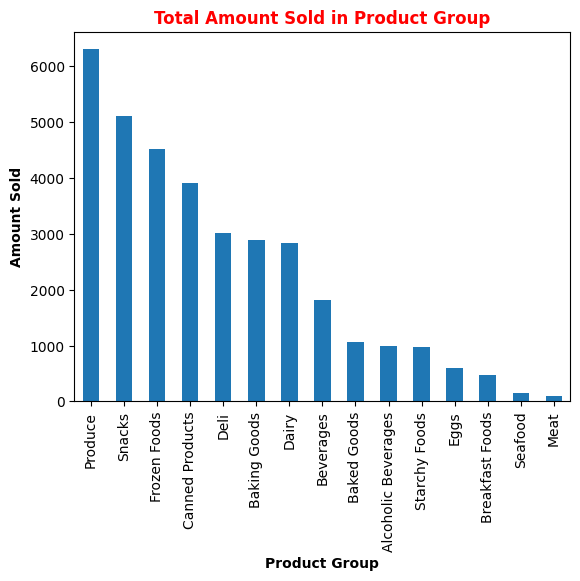

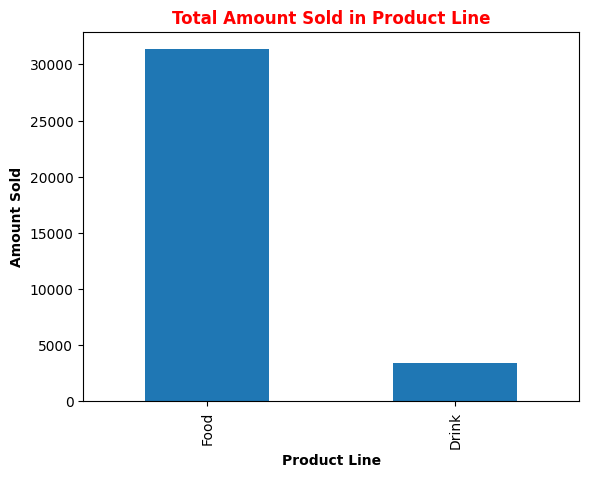

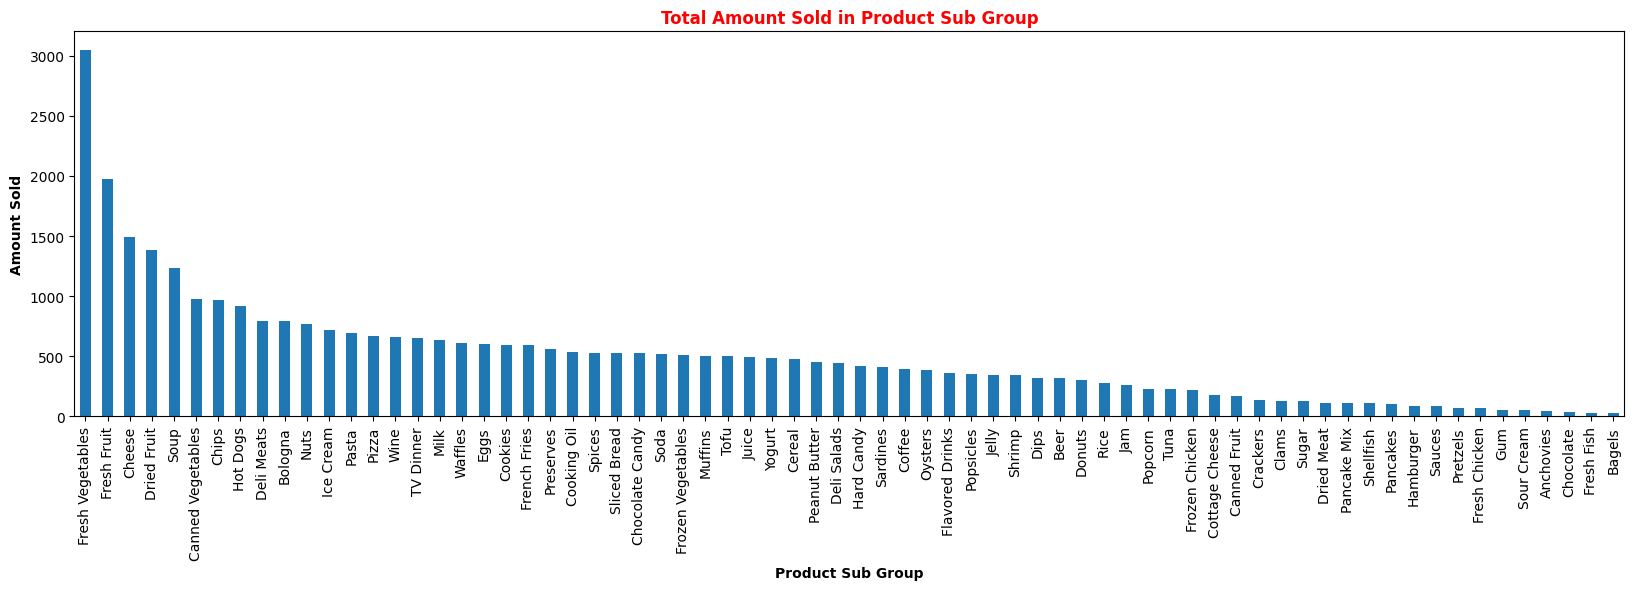

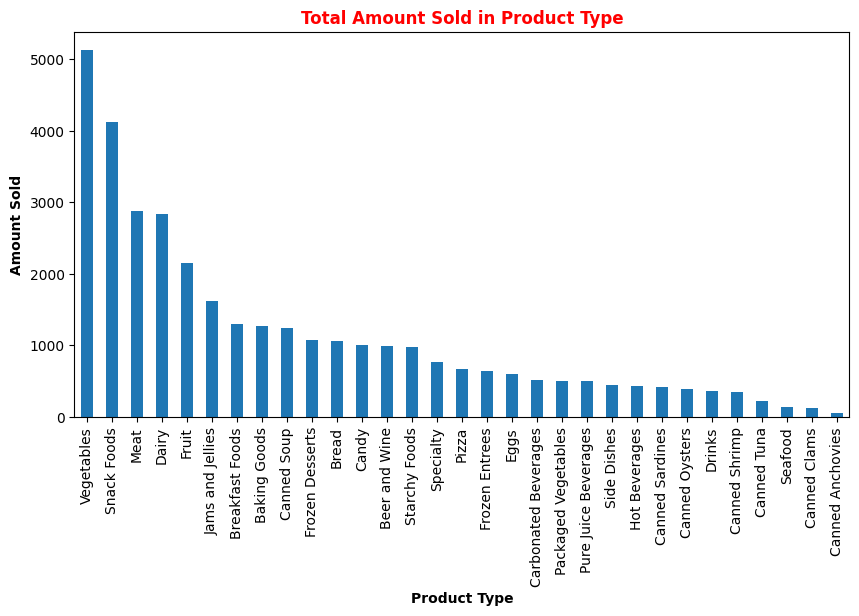

In [ ]:
# which item/category is the most sold in Product Group, Line, Sub Group, and Type

ax = final_combination['Product Group'].value_counts().plot(kind='bar')
ax.set_xlabel('Product Group', fontweight='bold')
ax.set_ylabel('Amount Sold', fontweight='bold')
title_text = ax.set_title('Total Amount Sold in Product Group', fontweight='bold')
title_text.set_color('red')
plt.show()
ax = final_combination['Product Line'].value_counts().plot(kind='bar')
ax.set_xlabel('Product Line', fontweight='bold')
ax.set_ylabel('Amount Sold', fontweight='bold')
title_text = ax.set_title('Total Amount Sold in Product Line', fontweight='bold')
title_text.set_color('red')
plt.show()
ax = final_combination['Product Sub Group'].value_counts().plot(kind='bar', figsize = (20,5))
ax.set_xlabel('Product Sub Group', fontweight='bold')
ax.set_ylabel('Amount Sold', fontweight='bold')
title_text = ax.set_title('Total Amount Sold in Product Sub Group', fontweight='bold')
title_text.set_color('red')
plt.show()
ax = final_combination['Product Type'].value_counts().plot(kind='bar', figsize = (10,5))
ax.set_xlabel('Product Type', fontweight='bold')
ax.set_ylabel('Amount Sold', fontweight='bold')
title_text = ax.set_title('Total Amount Sold in Product Type', fontweight='bold')
title_text.set_color('red')
plt.show()

# ans
# Product Group --> Produce
# Product Line --> Food
# Product Sub Group --> Fresh Vegetables
# Product  Type --> Vegetables

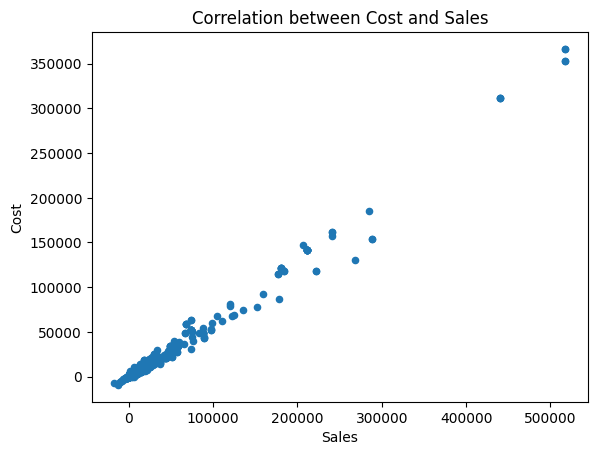

In [ ]:
# is there a correlation between cost and sales?

final_combination.plot(kind = 'scatter', x = 'Sales', y = 'Cost', title = 'Correlation between Cost and Sales');

#ans
# there is positive correlation between cost and sales
